In [84]:
# Do necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# import holidays, salary_dictionary, train-attendance, train-leaves, train-salary csv files in data folder from pd
holidays = pd.read_csv('../data/holidays.csv')
salary_dictionary = pd.read_csv('../data/salary_dictionary.csv')
train_attendance = pd.read_csv('../data/train-attendance.csv')
train_leaves = pd.read_csv('../data/train-leaves.csv')
train_salary = pd.read_csv('../data/train-salary.csv')

cleaned_emp = pd.read_csv('../employee_preprocess_200304N.csv')
report_salary = pd.read_csv('../testing/report_salary_df.csv')

resigned_employees = pd.read_csv('resigned_employees.csv')

C:\Users\Malshan\AppData\Local\Temp\ipykernel_3780\1858580289.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_attendance = pd.read_csv('../data/train-attendance.csv')


In [87]:
resigned_employees

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Gender_Marital_Status
0,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,Male-Married
1,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,Female-Married
2,353,155,Zena Nicolas,Mr,Male,1,Married,22,2003-09-29,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962,Male-Married
3,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967,Male-Married
4,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,5/5/2021,Inactive,5/5/2021,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976,Male-Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,5/4/2022,Inactive,5/4/2022,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986,Male-Married
760,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,8/27/2022,Inactive,8/26/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,Male-Married
761,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,9/19/2022,Inactive,9/19/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,Male-Married
762,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,Inactive,11/4/2022,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965,Male-Married


In [89]:
active_employees = cleaned_emp[cleaned_emp['Status'] == 'Active']
active_employees

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,2003-11-10,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
7,355,192,Josh Roob,Mr,Male,1,Married,126,2004-02-16,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Project Coordinator,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2831,5433,Ms Katelin Medhurst,Mr,Male,1,Single,111,2022-10-25,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Management Trainee,1996
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [94]:
# group employees in resigned_employees by religion
religion_resigned = resigned_employees.groupby('Religion').count()
religion_resigned = religion_resigned.reset_index()
religion_resigned = religion_resigned[['Religion', 'Employee_No']]
religion_resigned = religion_resigned.rename(columns={'Employee_No': 'Resigned_Employees'})
religion_resigned

,Religion,Resigned_Employees
0,Buddhist,640
1,Catholic,22
2,Hindu,83
3,Muslim,19


In [95]:
religion_active = active_employees.groupby('Religion').count()
religion_active = religion_active.reset_index()
religion_active = religion_active[['Religion', 'Employee_No']]
religion_active = religion_active.rename(columns={'Employee_No': 'Active_Employees'})
religion_active

,Religion,Active_Employees
0,Buddhist,202
1,Catholic,4
2,Hindu,18
3,Muslim,9


In [96]:
# merge
religion = pd.merge(religion_active, religion_resigned, on='Religion')
religion

,Religion,Active_Employees,Resigned_Employees
0,Buddhist,202,640
1,Catholic,4,22
2,Hindu,18,83
3,Muslim,9,19


In [97]:
# total
religion['Total'] = religion['Active_Employees'] + religion['Resigned_Employees']

# percentage  of resigned employees
religion['Percentage'] = religion['Resigned_Employees'] / religion['Total'] * 100
religion

,Religion,Active_Employees,Resigned_Employees,Total,Percentage
0,Buddhist,202,640,842,76.009501
1,Catholic,4,22,26,84.615385
2,Hindu,18,83,101,82.178218
3,Muslim,9,19,28,67.857143


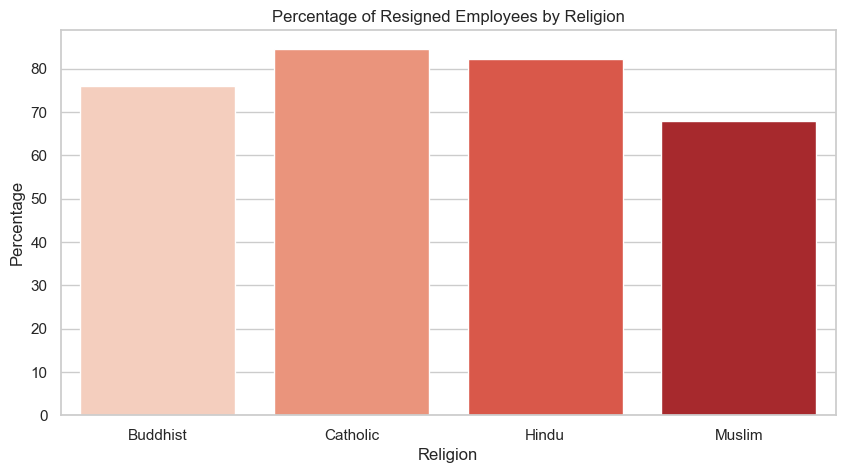

In [100]:
# create a bar plot theme is red
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='Religion', y='Percentage', data=religion, palette='Reds')
plt.title('Percentage of Resigned Employees by Religion')
plt.xlabel('Religion')
plt.ylabel('Percentage')
plt.show()

In [102]:
# group resigned employees by Employment_Category
employment_resigned = resigned_employees.groupby('Employment_Category').count()
employment_resigned = employment_resigned.reset_index()
employment_resigned = employment_resigned[['Employment_Category', 'Employee_No']]
employment_resigned = employment_resigned.rename(columns={'Employee_No': 'Resigned_Employees'})
employment_resigned

,Employment_Category,Resigned_Employees
0,Labour,464
1,Management,19
2,Staff,281


In [103]:
# group active employees in emp_cleaned by Employment_Category
employment_active = active_employees.groupby('Employment_Category').count()
employment_active = employment_active.reset_index()
employment_active = employment_active[['Employment_Category', 'Employee_No']]
employment_active = employment_active.rename(columns={'Employee_No': 'Active_Employees'})
employment_active

,Employment_Category,Active_Employees
0,Labour,104
1,Management,6
2,Staff,123


In [147]:
# do the same for employment_type
employment_type_resigned = resigned_employees.groupby('Employment_Type').count()
employment_type_resigned = employment_type_resigned.reset_index()
employment_type_resigned = employment_type_resigned[['Employment_Type', 'Employee_No']]
employment_type_resigned = employment_type_resigned.rename(columns={'Employee_No': 'Resigned_Employees'})
employment_type_resigned

,Employment_Type,Resigned_Employees
0,Contarct Basis,754
1,Permanant,10


In [151]:
employment_type_all = cleaned_emp.groupby('Employment_Type').count()
employment_type_all = employment_type_all.reset_index()
employment_type_all = employment_type_all[['Employment_Type', 'Employee_No']]
employment_type_all = employment_type_all.rename(columns={'Employee_No': 'All_employees'})
employment_type_all

,Employment_Type,All_employees
0,Contarct Basis,977
1,Permanant,20


In [154]:
# merge
employment_type = pd.merge(employment_type_all, employment_type_resigned, on='Employment_Type')

# percentage
employment_type['Percentage'] = employment_type['Resigned_Employees'] / employment_type['All_employees'] * 100

employment_type

,Employment_Type,All_employees,Resigned_Employees,Percentage
0,Contarct Basis,977,754,77.175026
1,Permanant,20,10,50.000000


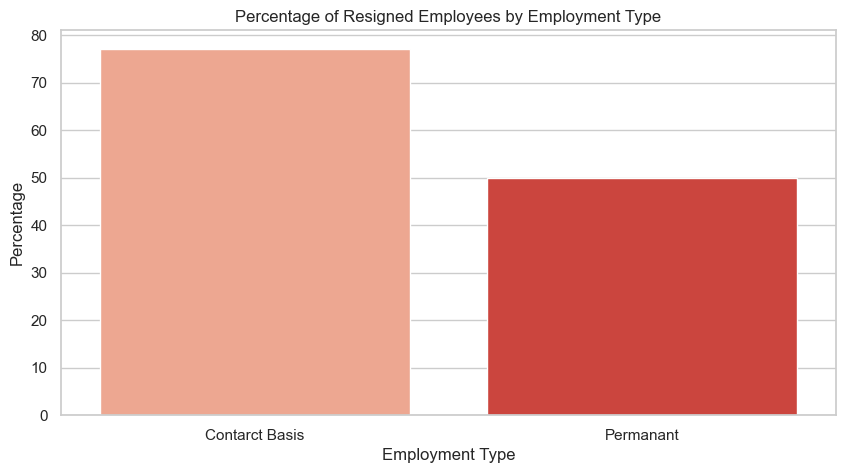

In [155]:
# create a double bar plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='Employment_Type', y='Percentage', data=employment_type, palette='Reds')
plt.title('Percentage of Resigned Employees by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage')
plt.show()


In [127]:
# merge
employment = pd.merge(employment_active, employment_resigned, on='Employment_Category')

# calculate total
employment['Total'] = employment['Active_Employees'] + employment['Resigned_Employees']

# calculate percentage
employment['Percentage'] = employment['Resigned_Employees'] / employment['Total'] * 100


# sort by Resigned_Employees
employment = employment.sort_values(by='Resigned_Employees', ascending=False)

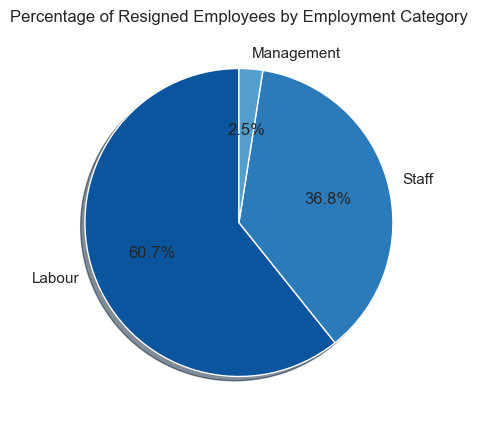

In [128]:
# create a pie plot for Resigned_Employees theme light blue
plt.figure(figsize=(10, 5))
plt.pie(employment['Resigned_Employees'], labels=employment['Employment_Category'], autopct='%1.1f%%', shadow=True,
        startangle=90, colors=sns.color_palette('Blues_r'))
plt.title('Percentage of Resigned Employees by Employment Category')
plt.show()


In [105]:
# do same for Designation
designation_resigned = resigned_employees.groupby('Designation').count()
designation_resigned = designation_resigned.reset_index()
designation_resigned = designation_resigned[['Designation', 'Employee_No']]
designation_resigned = designation_resigned.rename(columns={'Employee_No': 'Resigned_Employees'})
designation_resigned

,Designation,Resigned_Employees
0,Account Clerk,1
1,Account Executive,9
2,Accountant,5
3,Assistance QS,2
4,Assistant Accountant,5
...,...,...
97,Trainee Technical Officer,1
98,Transport Assistant,1
99,Transport Officer,1
100,Unskilled Labor,291


In [106]:
# for active employees
designation_active = active_employees.groupby('Designation').count()    
designation_active = designation_active.reset_index()
designation_active = designation_active[['Designation', 'Employee_No']]
designation_active = designation_active.rename(columns={'Employee_No': 'Active_Employees'})

# merge
designation = pd.merge(designation_active, designation_resigned, on='Designation')

# calculate total
designation['Total'] = designation['Active_Employees'] + designation['Resigned_Employees']

# calculate percentage
designation['Percentage'] = designation['Resigned_Employees'] / designation['Total'] * 100
designation


,Designation,Active_Employees,Resigned_Employees,Total,Percentage
0,Account Clerk,1,1,2,50.000000
1,Accountant,1,5,6,83.333333
2,Assistant Accountant,1,5,6,83.333333
3,Assistant QS,1,4,5,80.000000
4,Autocad Draughtsman,2,1,3,33.333333
5,Bar Bender,8,3,11,27.272727
6,Caretaker,2,4,6,66.666667
7,Construction Manager,1,2,3,66.666667
8,Cook,2,6,8,75.000000
9,Data Colector,2,6,8,75.000000


In [107]:
# get top 10 Designation with highest resigned employees
top_10_designation = designation.sort_values(by='Percentage', ascending=False).head(10)
top_10_designation


,Designation,Active_Employees,Resigned_Employees,Total,Percentage
36,Skilled Labor,1,33,34,97.058824
22,Mason,2,25,27,92.592593
15,Fitter,2,21,23,91.304348
33,Semi Skilled Labor,3,24,27,88.888889
43,Unskilled Labor,52,291,343,84.839650
1,Accountant,1,5,6,83.333333
2,Assistant Accountant,1,5,6,83.333333
3,Assistant QS,1,4,5,80.000000
39,Supervisor,5,20,25,80.000000
34,Site Engineer,6,21,27,77.777778


In [111]:
# get least 10 Designation with lowest resigned employees
least_10_designation = designation.sort_values(by='Percentage', ascending=True).head(10)
least_10_designation

,Designation,Active_Employees,Resigned_Employees,Total,Percentage
5,Bar Bender,8,3,11,27.272727
44,Wacher,2,1,3,33.333333
38,Stores Helper,2,1,3,33.333333
4,Autocad Draughtsman,2,1,3,33.333333
42,Trainee Purchasing Officer,1,1,2,50.000000
37,Store Keeper,12,12,24,50.000000
30,S/Skill,1,1,2,50.000000
24,Operation Executive,1,1,2,50.000000
21,Manager Transport and Logistic,1,1,2,50.000000
20,Management Trainee,1,1,2,50.000000


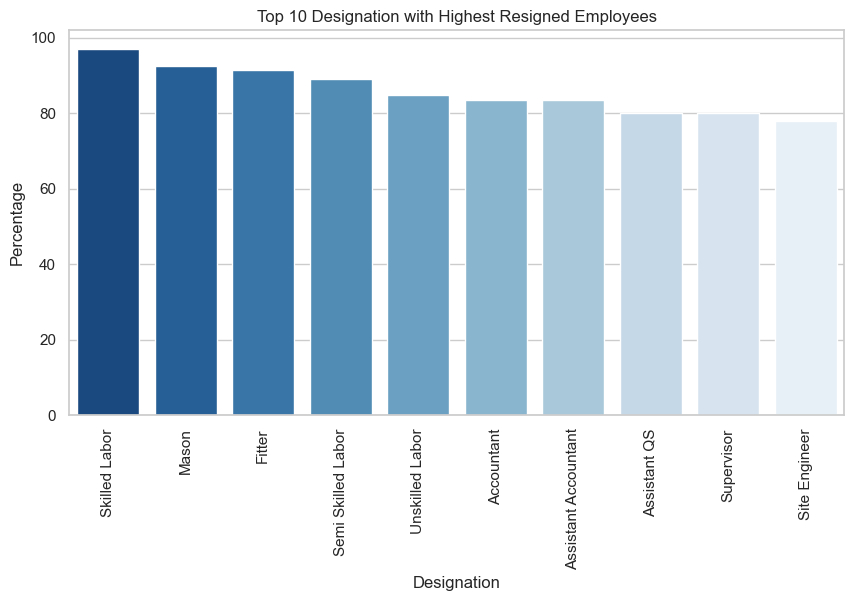

In [110]:
# bar plot with reverse blue theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='Designation', y='Percentage', data=top_10_designation, palette='Blues_r')
plt.title('Top 10 Designation with Highest Resigned Employees')
plt.xlabel('Designation')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

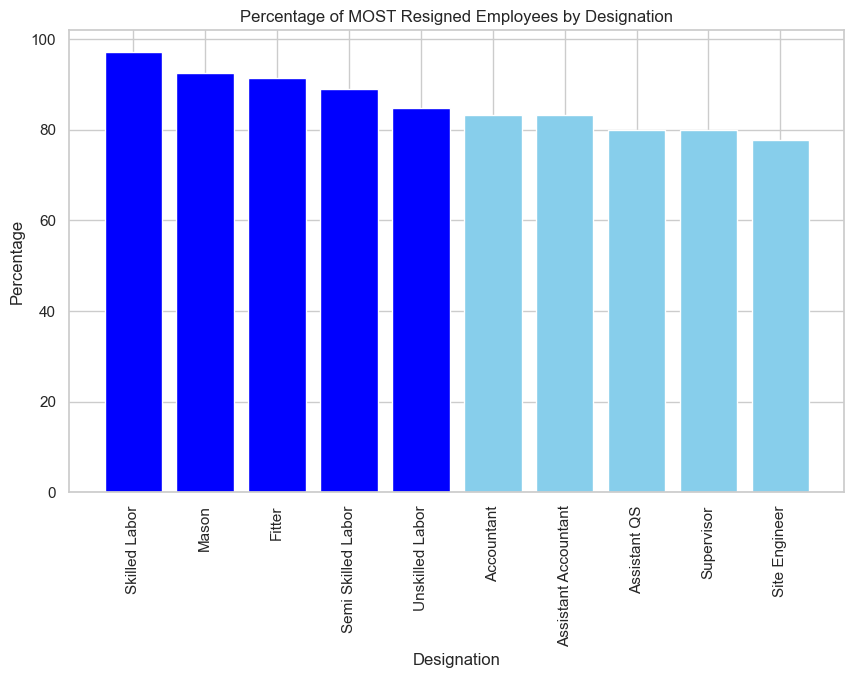

In [124]:
# Select the necessary columns for plotting
designation = top_10_designation["Designation"]
percentage = top_10_designation["Percentage"]

# Set the color for the first five bars as Blue
color = ["Blue" if i < 5 else "skyblue" for i in range(len(top_10_designation))]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(designation, percentage, color=color)

# Set the x-axis and y-axis labels
plt.xlabel("Designation")
plt.ylabel("Percentage")

# Set the title of the graph
plt.title("Percentage of MOST Resigned Employees by Designation")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.show()

In [129]:
resigned_employees

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Gender_Marital_Status
0,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,Male-Married
1,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,Female-Married
2,353,155,Zena Nicolas,Mr,Male,1,Married,22,2003-09-29,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962,Male-Married
3,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967,Male-Married
4,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,5/5/2021,Inactive,5/5/2021,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976,Male-Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,5/4/2022,Inactive,5/4/2022,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986,Male-Married
760,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,8/27/2022,Inactive,8/26/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,Male-Married
761,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,9/19/2022,Inactive,9/19/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,Male-Married
762,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,Inactive,11/4/2022,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965,Male-Married


In [146]:
# group by employees from Labour Category by Gender_Marital_Status

labour_resigned = resigned_employees[resigned_employees['Employment_Category'] == 'Labour'].groupby('Gender').count()
labour_resigned = labour_resigned.reset_index()

labour_resigned = labour_resigned.iloc[:, :2]
labour_resigned = labour_resigned.rename(columns={'Employee_No': 'Resigned_Employees'})
labour_resigned


,Gender,Resigned_Employees
0,Female,8
1,Male,456


In [141]:
cleaned_emp

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Miss,Female,1,Single,17,2022-11-01,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [143]:
cleaned_emp["Gender_Marital_Status"] = cleaned_emp["Gender"] + "-" + cleaned_emp["Marital_Status"]

In [145]:
labour_total = cleaned_emp[cleaned_emp['Employment_Category'] == 'Labour'].groupby('Gender').count()
labour_total = labour_total.reset_index()

labour_total = labour_total.iloc[:, :2]
labour_total = labour_total.rename(columns={'Employee_No': 'Resigned_Employees'})
labour_total

,Gender,Resigned_Employees
0,Female,15
1,Male,553
